In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import math
from statistics import *

### Statistical Analysis for different feature types
The data has 4 different types of features: Nominal, Ordinal, Interval, Ratio. We can do statistical analysis on each of feature type to discover hidden patterns.

- Nominal: 'genres' from title.Basics.csv | Find **Mode** and **Entropy**
- Ordinal: 'episodeNumber' from title.episodes.csv | Find **Median** and **Percentile**
- Interval: 'birthYear' from name.basics.csv | Find **Mean** and **Standard Deviation**
- Ratio: 'averageRating' from title.ratings.csv | Find **Geometric Mean** and **Harmonic Mean**

In [2]:
titleBasicsDf = pd.read_csv('dataset/originalDataset/title.basics.csv', sep='\t', low_memory=False)
titleBasicsDf.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
titleEpisodesDf = pd.read_csv('dataset/originalDataset/title.episode.csv', sep='\t', low_memory=False)
titleEpisodesDf.head(5)

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3
3,tt0021612,tt15180956,2,2
4,tt0021655,tt15180956,2,5


In [4]:
nameBasicsDf = pd.read_csv('dataset/originalDataset/name.basics.csv', sep='\t', low_memory=False)
nameBasicsDf.head(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0117057,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0056404,tt0057345,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0078723,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050976,tt0050986,tt0083922"


In [5]:
titleRatingsDf = pd.read_csv('dataset/originalDataset/title.ratings.csv', sep='\t', low_memory=False)
titleRatingsDf.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1901
1,tt0000002,5.9,255
2,tt0000003,6.5,1697
3,tt0000004,5.7,167
4,tt0000005,6.2,2517


Nominal: Find the mode and Entropy for 'genres'

The mode for genres is Drama.


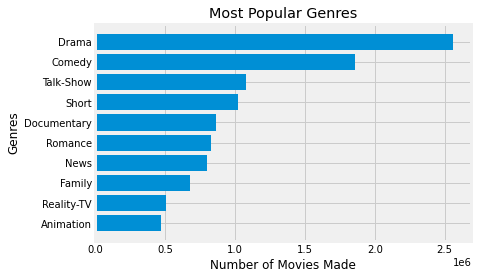

In [6]:
# Find the mode for the nominal dimension 'genres'

series_genres = titleBasicsDf['genres'] # A Series object with no n/a's

genreList = []
for genre in series_genres:
    if type(genre) is str and genre != '\\N': # Look for genres that have a string value and not null
        some_genres = genre.split(",") # Split strings that have more than one genre
        genreList.extend(some_genres) # Update dictionary genre counter

modeResults = mode(genreList)
print(f"The mode for genres is {modeResults}.")

# Describing the results (mode) via a graph
plt.style.use("fivethirtyeight")

# Create the x- and y-axis
df_genres = titleBasicsDf["genres"]

counter = Counter()

for index, genre in df_genres.items():
    if type(genre) is str:
        some_genres = genre.split(",")
        counter.update(some_genres)
        
genres = []
num_movies = []

for genre, mov_count in counter.most_common(10):
    genres.append(genre)
    num_movies.append(mov_count)

genres.reverse()
num_movies.reverse()

plt.barh(genres, num_movies) # Use this when text labels in the x-axis become too long

plt.title("Most Popular Genres")
plt.ylabel("Genres")
plt.xlabel("Number of Movies Made")

plt.show()

In [11]:
# Describing the results (mode) via the dataframe series object

counter = Counter()
for genre in series_genres:
    if type(genre) is str and genre != '\\N': # Look for genres that have a string value and not null
        some_genres = genre.split(",") # Split strings that have more than one genre
        counter.update(some_genres) # Update dictionary genre counter

genreCount = counter.items() # Count the number of unique genres that occur in the series object
genreList = list(genreCount) # Dictionary to List in order to sort the tuples by value in ascending order
genreSortedList = sorted(genreList, key=lambda x: x[1])
genreSortedDict = dict(genreSortedList) # Convert back into a dict but sorted by values in ascending order

df_genreSortedList = pd.DataFrame(genreSortedList, columns=['Genre', 'Number of Movies Made'])
df_genreSortedList

,Genre,Number of Movies Made
0,Film-Noir,804
1,Western,29320
2,War,32167
3,Musical,83392
4,Biography,99485
5,Sci-Fi,101831
6,History,135217
7,Thriller,151326
8,Horror,163694
9,Mystery,177481


In [13]:
# Find the entropy (Shannon's entropy) for the nominal dimension 'genres'

genreCountTotal = sum(n for _, n in genreSortedList) # Sum of all genres counted in the dataframe
entropyDict = {}
genreEntropyTotal = 0

prob_values = []

for value in genreSortedDict.values():
    probabilitiesPerGenre = value / genreCountTotal # Probability of one genre's count / total genres count
    entropy_genre =  probabilitiesPerGenre * math.log2(probabilitiesPerGenre)
    prob_values.append(entropy_genre)

entropy = round(-sum(prob_values), 2)
print(f"The entropy for genres is {entropy}.")

# Describing the results (entropy) via the calculations performed earlier stored in the the list 'prob_values'
# By summing up all the individual genre's entropies, the total entropy will be calculated as shown above

data_entropy = {'Genres': genreSortedDict.keys(), 'Entropy for each Genre': prob_values}
df_entropy = pd.DataFrame(data_entropy) 
df_entropy

The entropy for genres is 4.09.


,Genres,Entropy for each Genre
0,Film-Noir,-0.000803
1,Western,-0.018501
2,War,-0.019993
3,Musical,-0.043716
4,Biography,-0.050360
5,Sci-Fi,-0.051305
6,History,-0.064209
7,Thriller,-0.070118
8,Horror,-0.074536
9,Mystery,-0.079347


### Analysis
- Based on these two visuals, “Drama” is proven to be the genrethat appears the most often. 
- Entropy is 4.08, the table shows the entropy for each genre is shown and most of
them are equally likely to happen but at a very low possibility, with “Drama” having the
highest entropy

Ordinal: Find the median and Percentile for 'episodeNumber'

In [15]:
# Find the median for the ordinal dimension 'episodeNumber'

series_episodeNumber = titleEpisodesDf['episodeNumber'] # A Series object with no n/a's
episodeNumberList = []
#print(series_genres2.index)
for row_Index, episodeNumber in enumerate(series_episodeNumber):
    if type(episodeNumber) is str and episodeNumber != '\\N': # Look for episodeNumbers that have a string value and not null
        episodeNumberList.append(int(episodeNumber)) # Add those non-null values into a list and convert into an int for statistical processing (median, percentile)


medianResults = median(episodeNumberList)
print(f"The median for episodeNumber is {medianResults}.")


# Find the percentile for the ordinal dimension 'episodeNumber'

episodeNumberArray = np.array(episodeNumberList) # Convert list into an array to use the built-in percentile function by numpy

percentile_25 = int(np.percentile(episodeNumberArray, 25))
percentile_50 = int(np.percentile(episodeNumberArray, 50))
percentile_75 = int(np.percentile(episodeNumberArray, 75))

print(f"The percentiles for the 25th, 50th and 75th of episodeNumber are as follows:\n 25th percentile = {percentile_25}, 50th percentile = {percentile_50}, 75th percentile = {percentile_75}.")


The median for episodeNumber is 25.0.
The percentiles for the 25th, 50th and 75th of episodeNumber are as follows:
 25th percentile = 7, 50th percentile = 25, 75th percentile = 141.


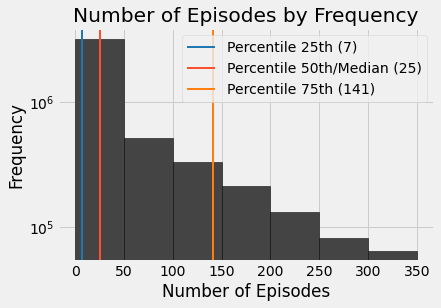

In [16]:
# Describe the results by graphing out the episodeNumbers and showing where the percentiles and median are located

bins = [0, 50, 100, 150, 200, 250, 300, 350]
plt.hist(episodeNumberList, bins=bins, edgecolor="black", color="#444444")

plt.yscale('log')

plt.axvline(percentile_25, color='#1f77b4', label=f'Percentile 25th ({percentile_25})', linewidth=2)
plt.axvline(percentile_50, color='#fc4f30', label=f'Percentile 50th/Median ({percentile_50})', linewidth=2)
plt.axvline(percentile_75, color='#ff7f0e', label=f'Percentile 75th ({percentile_75})', linewidth=2)
plt.legend()

plt.title("Number of Episodes by Frequency")
plt.xlabel("Number of Episodes")
plt.ylabel("Frequency")

plt.show()

### Analysis
- The median episodeNumber is 25, and the percentiles at 25th, 50th and 75th are 7, 25, and 141 respectively.
- Movies and Shows with <25 episodes dominate the scene

Interval: Find the mean and Standard Deviation for 'birthYear'

The mean for birthYear is 1952.
The standard deviation for birthYear is 31.19.


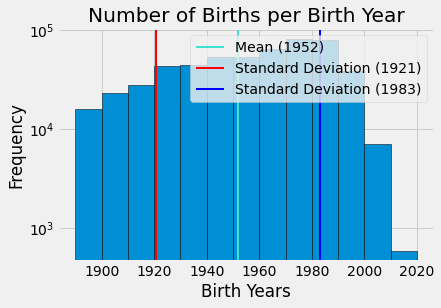

In [19]:
# Find the mean for the interval dimension 'birthYear'

series_birthYear = nameBasicsDf['birthYear'] # A Series object with no n/a's

birthYearList = []

for birthYear in series_birthYear:

    if type(birthYear) is str and birthYear.isnumeric() and int(birthYear) >= 1850:
        birthYearList.append(int(birthYear))

meanResults = int(mean(birthYearList)) # Note: Data has some weird values shown (Ex. Starting from single digit years)
print(f"The mean for birthYear is {meanResults}.")

# Find the standard deviation for the interval dimension 'birthYear'

standardDevResults = round(pstdev(birthYearList), 2)
print(f"The standard deviation for birthYear is {standardDevResults}.")


# Describe the results by graphing out the birthYear and showing where the mean and standard deviation are located

plt.style.use('fivethirtyeight')

bins = [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

plt.hist(birthYearList, bins = bins, edgecolor='black', log=True)

color_mean = '#40e0d0'
color_stdv = '#fc4f30'

plt.axvline(meanResults, color=color_mean, label=f'Mean ({meanResults})', linewidth=2)
plt.axvline(meanResults - standardDevResults, color='red', label=f'Standard Deviation ({round(meanResults - standardDevResults)})', linewidth=2)
plt.axvline(meanResults + standardDevResults, color='blue', label=f'Standard Deviation ({round(meanResults + standardDevResults)})', linewidth=2)

plt.legend()

plt.title("Number of Births per Birth Year") 
plt.xlabel("Birth Years")
plt.ylabel("Frequency")

plt.show()

### Analysis
- Most people in the database are born in 1952 and the standard deviation is 31 years
- The peak is 1980s, then the birth Years falls off after 1980s and 2000-2020 being the lowest # of births
- This could largely be due to low data or the baby boom

Ratio: Find the Geometric and Harmonic Mean for 'averageRating'

Geometric Mean: 6.74
Harmonic Mean: 6.5


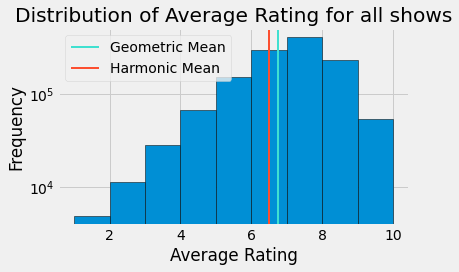

In [26]:
# Find the geometric mean for the ratio dimension 'averageRating'

averageRating = titleRatingsDf['averageRating']
geometricMeanResults = round(geometric_mean(averageRating), 2)
print(f'Geometric Mean: {geometricMeanResults}')

# Find the harmonic mean for the ratio dimension 'averageRating'

harmonicMeanResults = round(harmonic_mean(averageRating), 2)
print(f'Harmonic Mean: {harmonicMeanResults}')

# Describe the results by graphing out the averageRating and showing where the geometric mean and harmonic mean are located

bins = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# the log parameter allows us to see the data in a semi-log scale to see frequency of groups with smaller counts
plt.hist(averageRating, bins=bins, edgecolor='black', log=True)

color_g_mean = '#40e0d0'
color_h_mean = '#fc4f30'

# Add the geometric and harmonic mean line allowing us to see infer information about the data
plt.axvline(geometricMeanResults, color=color_g_mean, label=f'Geometric Mean', linewidth=2)
plt.axvline(harmonicMeanResults, color=color_h_mean, label=f'Harmonic Mean', linewidth=2)

plt.legend()

plt.title('Distribution of Average Rating for all shows')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analysis
- The geometric mean is 6.74 and the harmonic mean is 6.5. 
- The values for averageRatings do not have any units nor do they have rates,
which causes the geometric mean and harmonic mean to be marginally similar to one
another.